#**Parkinson Disease Prediction using Machine Learning**

In [1]:
# ================================================================
# 1. IMPORT LIBRARIES
# ================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [2]:
# ================================================================
# 2. LOAD DATASET
# ================================================================

from google.colab import files
uploaded = files.upload()

Saving parkinson_disease.csv to parkinson_disease.csv


In [3]:
df = pd.read_csv("parkinson_disease.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (756, 755)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
# ================================================================
# 3. CHECK MISSING VALUES
# ================================================================

print(df.isnull().sum())

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


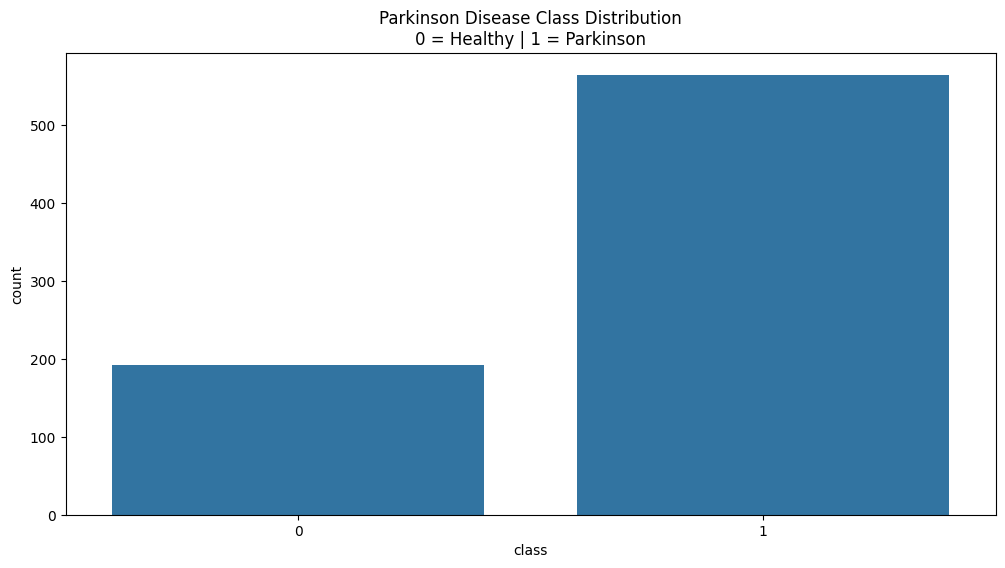

In [7]:
# ================================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ================================================================

plt.figure(figsize=(12,6))
sns.countplot(x='class', data=df)
plt.title("Parkinson Disease Class Distribution\n0 = Healthy | 1 = Parkinson")
plt.show()


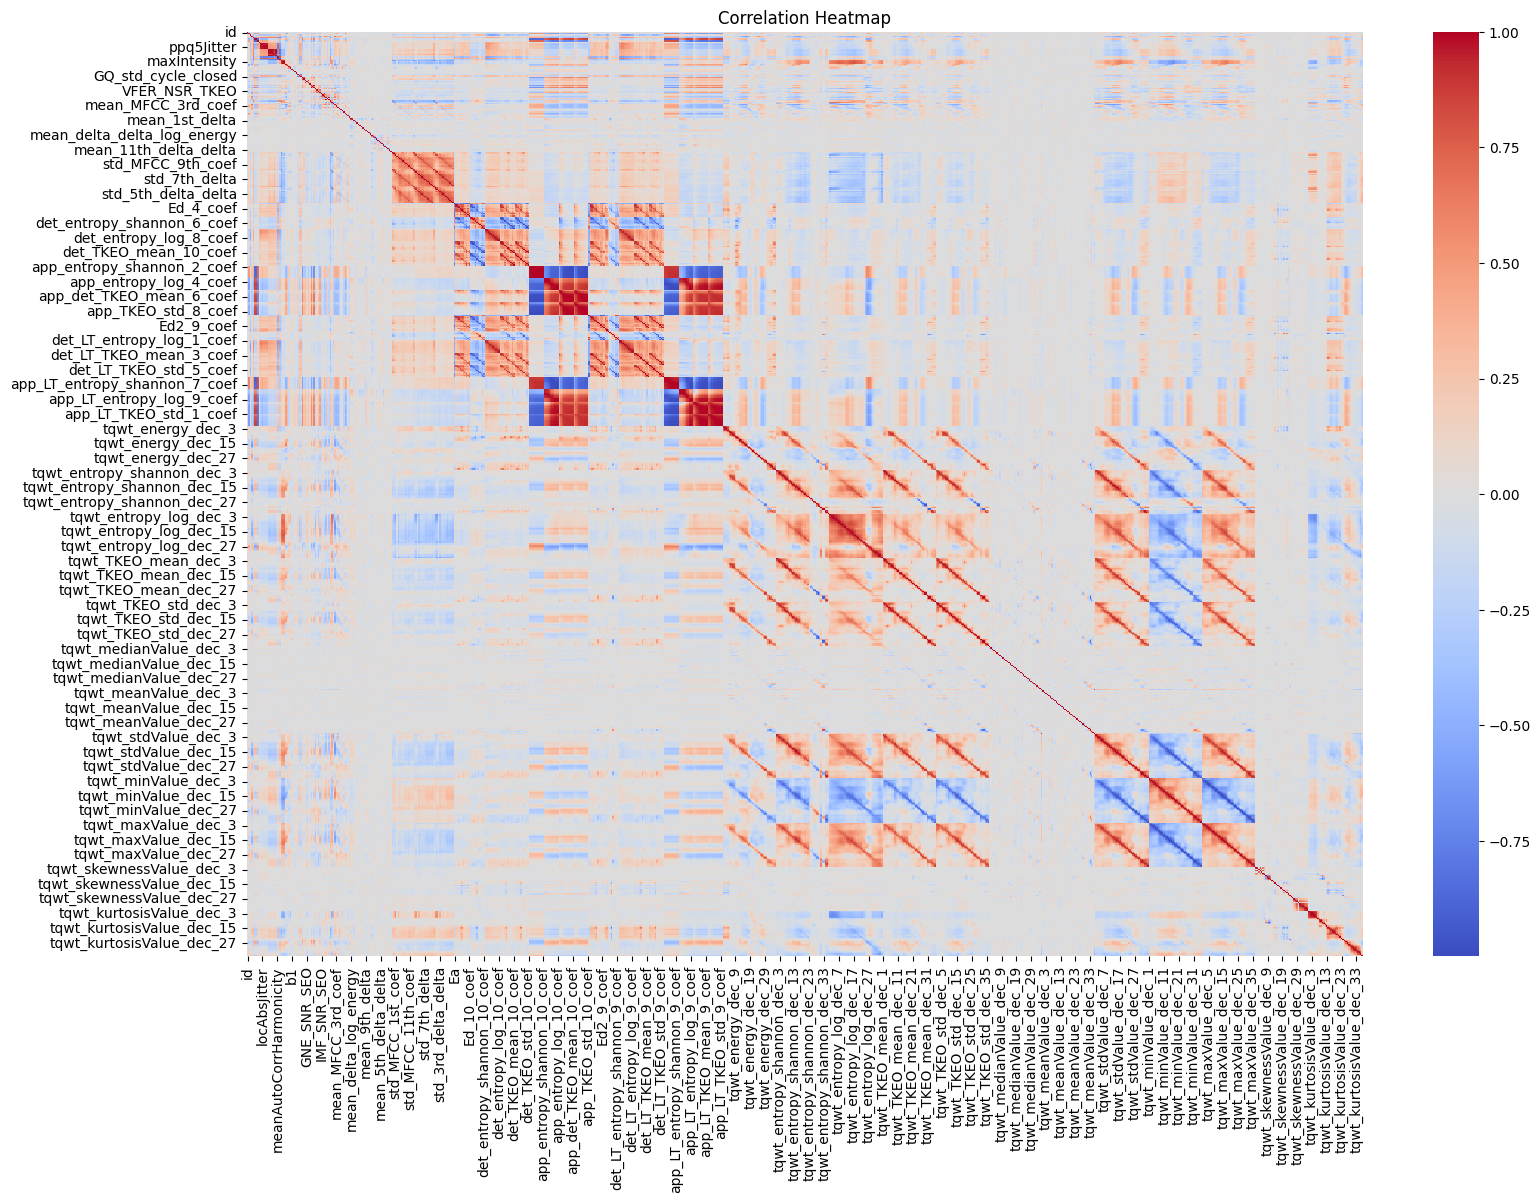

In [8]:
# Correlation Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# ================================================================
# 5. SPLIT FEATURES & LABEL
# ================================================================
X = df.drop(['class'], axis=1)
y = df['class']

# Check imbalance
print("Class distribution:")
print(y.value_counts())

# Apply SMOTE if imbalanced
sm = SMOTE()
X, y = sm.fit_resample(X, y)

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Class distribution:
class
1    564
0    192
Name: count, dtype: int64


In [11]:
# ================================================================
# 6. TRAIN MULTIPLE MODELS
# ================================================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ])

results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"
])

results_df


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:36:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.893805,0.979381,0.811966,0.887850,0.963146
1,SVM,0.929204,0.931624,0.931624,0.931624,0.979691
2,Random Forest,0.933628,0.963636,0.905983,0.933921,0.989022
3,XGBoost,0.946903,0.972973,0.923077,0.947368,0.993962


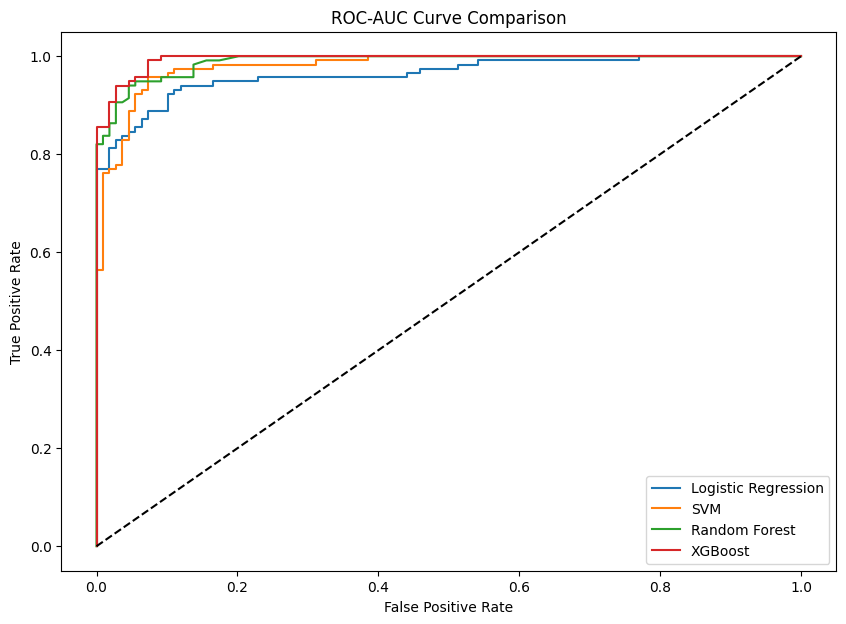

In [12]:
# ================================================================
# 7. PLOT ROC CURVES
# ================================================================
plt.figure(figsize=(10,7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [13]:
# ================================================================
# 8. BEST MODEL (XGBOOST) – FINAL PREDICTION
# ================================================================
best_model = models["XGBoost"]

print("\nClassification Report:")
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Example prediction
sample = X_test[0].reshape(1, -1)
prediction = best_model.predict(sample)

print("\nSample Prediction (0 = Healthy, 1 = Parkinson):", prediction)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       109
           1       0.97      0.92      0.95       117

    accuracy                           0.95       226
   macro avg       0.95      0.95      0.95       226
weighted avg       0.95      0.95      0.95       226


Sample Prediction (0 = Healthy, 1 = Parkinson): [0]
